In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Import data
df = pd.read_csv('/Users/brianoktavec/MSC550/Midterm/housing_train.csv')
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,price
0,4306.971093,4,2,3,yes,no,no,no,yes,2,23807.62253
1,4732.863826,4,4,4,yes,no,no,no,yes,3,46173.57355
2,4989.989980,3,2,2,yes,no,yes,no,no,2,25491.22063
3,4330.127019,4,2,2,yes,no,yes,no,yes,3,18941.80522
4,4306.971093,4,1,2,yes,yes,yes,no,yes,2,17582.99123


In [3]:
# Make a copy of the data
df1 = df
# Convert yes/no to dummy data - 1 & 0
df1 = pd.get_dummies(df, columns=['guestroom','mainroad','basement','hotwaterheating','airconditioning'], drop_first=True)
# Rearrange the columns
df1 = df1[['price','area','bedrooms','bathrooms','stories','parking','guestroom_yes','mainroad_yes','basement_yes','hotwaterheating_yes','airconditioning_yes']]

df1.head()


,price,area,bedrooms,bathrooms,stories,parking,guestroom_yes,mainroad_yes,basement_yes,hotwaterheating_yes,airconditioning_yes
0,23807.62253,4306.971093,4,2,3,2,0,1,0,0,1
1,46173.57355,4732.863826,4,4,4,3,0,1,0,0,1
2,25491.22063,4989.989980,3,2,2,2,0,1,1,0,0
3,18941.80522,4330.127019,4,2,2,3,0,1,1,0,1
4,17582.99123,4306.971093,4,1,2,2,1,1,1,0,1


### Base Model Made for reference 

In [4]:
# Get baseline linear regression
ols = sm.OLS(df1.price, sm.add_constant(df1.iloc[:, 1:11]))
lm1 = ols.fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     346.4
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          7.67e-225
Time:                        23:11:36   Log-Likelihood:                -4935.6
No. Observations:                 540   AIC:                             9893.
Df Residuals:                     529   BIC:                             9940.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -1.99e+04    

Text(0, 0.5, 'Residuals')

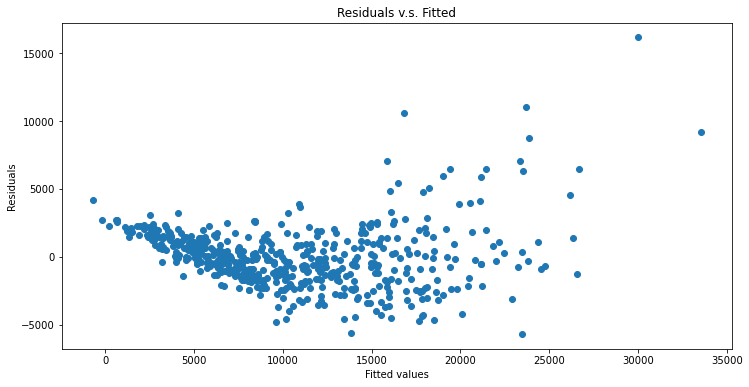

In [5]:
fitted_y = lm1.fittedvalues
residual = lm1.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title('Residuals v.s. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

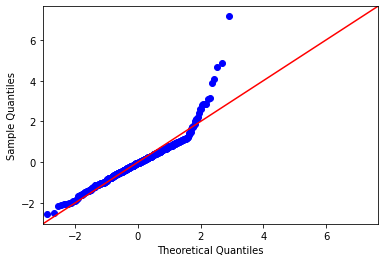

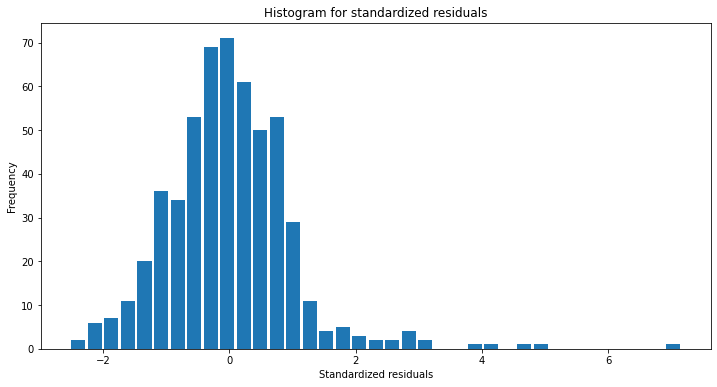

In [6]:
from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

#### Check significance of predictors

In [7]:
# MSE to find predictors that are significant
import scipy.stats as st
from scipy.stats import ttest_ind
for x in df1:
    print(x + " Test:")
    y = ttest_ind(df1['price'], df1[x])
    print(y)
    print("")

price Test:
Ttest_indResult(statistic=0.0, pvalue=1.0)

area Test:
Ttest_indResult(statistic=26.228254887672637, pvalue=1.1312753832563398e-117)

bedrooms Test:
Ttest_indResult(statistic=39.554745584927986, pvalue=4.051328156277004e-212)

bathrooms Test:
Ttest_indResult(statistic=39.56104598689239, pvalue=3.6594749836403576e-212)

stories Test:
Ttest_indResult(statistic=39.55908210332464, pvalue=3.7773694461208557e-212)

parking Test:
Ttest_indResult(statistic=39.56328690387416, pvalue=3.5294392318978497e-212)

guestroom_yes Test:
Ttest_indResult(statistic=39.56520226357173, pvalue=3.4219648116359064e-212)

mainroad_yes Test:
Ttest_indResult(statistic=39.56264193129849, pvalue=3.5663845659017736e-212)

basement_yes Test:
Ttest_indResult(statistic=39.56454999232993, pvalue=3.4581922918143715e-212)

hotwaterheating_yes Test:
Ttest_indResult(statistic=39.565688017761595, pvalue=3.3952326181288783e-212)

airconditioning_yes Test:
Ttest_indResult(statistic=39.56468877082995, pvalue=3.450452

#### CLEAN UP: Find outliers and remove them

In [8]:
df1.describe()

,price,area,bedrooms,bathrooms,stories,parking,guestroom_yes,mainroad_yes,basement_yes,hotwaterheating_yes,airconditioning_yes
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,10559.781821,3513.214918,2.964815,1.283333,1.807407,0.685185,0.174074,0.857407,0.348148,0.044444,0.311111
std,6201.993044,715.846747,0.741472,0.501667,0.870001,0.859824,0.379525,0.349981,0.476825,0.206271,0.463377
min,2531.205871,2031.009601,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6016.201246,2991.862894,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,8714.563290,3368.967933,3.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,13716.144488,3987.480407,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,46173.573550,6363.961031,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

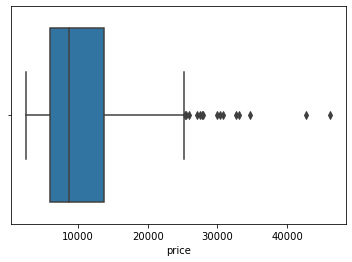

In [9]:
import seaborn as sns
sns.boxplot(df1['price'])

In [10]:
price_drop = np.where(df1['price']>22000)
print(price_drop)

(array([  0,   1,   2,   6,   7,   8,  10,  17,  25,  30,  32,  38,  44,
        51,  52,  53,  61,  64,  77,  84,  91, 120, 124, 157, 181, 186,
       206, 215, 224, 242, 396, 447]),)


In [11]:
# Clean up price
for i in price_drop:
    df2 = df1.drop(i)

/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

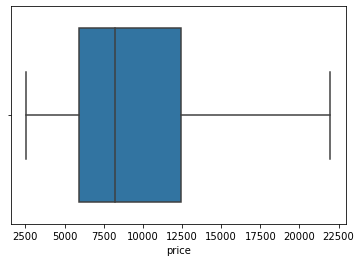

In [12]:
sns.boxplot(df2['price'])

/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

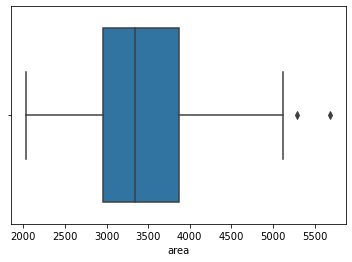

In [13]:
sns.boxplot(df2['area'])

In [14]:
area_drop = np.where(df2['area']>5100)
print(area_drop)

(array([ 43, 114, 118, 367]),)


In [15]:
# Clean up area

for i in area_drop:
    df3 = df2.drop(i)

In [16]:
ols = sm.OLS(df2.price, sm.add_constant(df2.iloc[:, 1:11]))
lm2 = ols.fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     361.7
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          8.08e-221
Time:                        23:11:37   Log-Likelihood:                -4461.1
No. Observations:                 508   AIC:                             8944.
Df Residuals:                     497   BIC:                             8991.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.559e+04    

Text(0, 0.5, 'Residuals')

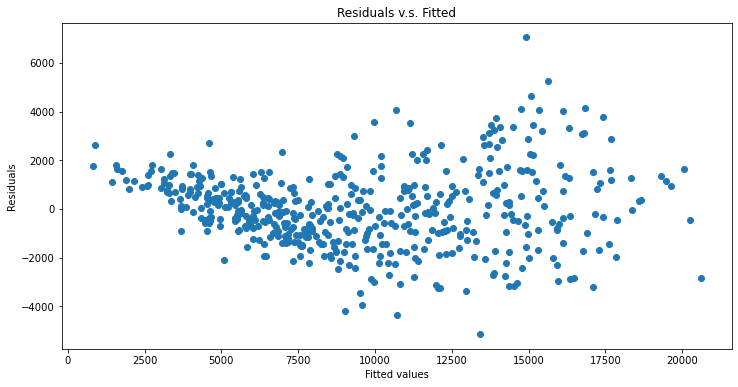

In [17]:
fitted_y = lm2.fittedvalues
residual = lm2.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title('Residuals v.s. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

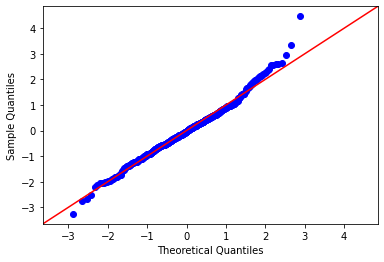

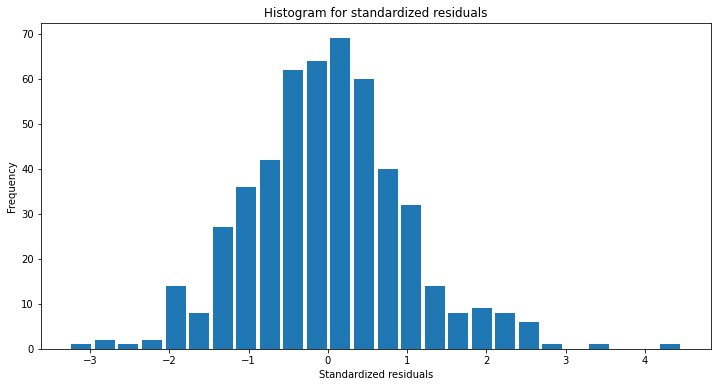

In [18]:
from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

In [19]:
df2.describe()

,price,area,bedrooms,bathrooms,stories,parking,guestroom_yes,mainroad_yes,basement_yes,hotwaterheating_yes,airconditioning_yes
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,9519.388039,3425.473632,2.931102,1.255906,1.759843,0.629921,0.171260,0.848425,0.346457,0.045276,0.301181
std,4539.332591,626.170290,0.730551,0.467340,0.826939,0.828993,0.377107,0.358962,0.476310,0.208113,0.459223
min,2531.205871,2031.009601,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5927.441516,2962.895521,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,8218.727653,3337.246754,3.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,12407.493525,3872.983346,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,21965.800940,5688.585061,6.000000,3.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

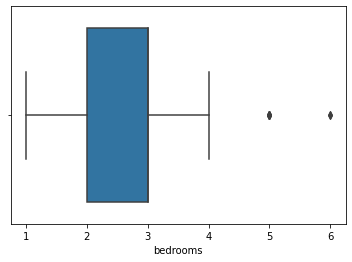

In [20]:
sns.boxplot(df2['bedrooms'])

In [21]:
room_drop = np.where(df3['bedrooms']>4)

In [22]:
# Clean up bedrooms

for i in room_drop:
    df4 = df3.drop(i)

/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stories'>

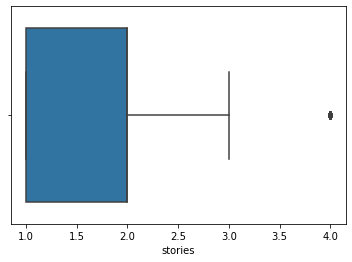

In [23]:
sns.boxplot(df4['stories'])

In [24]:
stories_drop = np.where(df4['stories']>3)
store = [3, 11, 21, 23, 24, 27, 28, 29, 31, 35, 45, 46, 47, 56, 63, 65, 72, 75, 95, 99, 104, 109, 185]

In [25]:
# Clean up stories

for i in store:
    df5 = df4.drop(i)

In [26]:
ols = sm.OLS(df5.price, sm.add_constant(df5.iloc[:, 1:11]))
lm3 = ols.fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     353.7
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          9.35e-215
Time:                        23:11:38   Log-Likelihood:                -4323.1
No. Observations:                 493   AIC:                             8668.
Df Residuals:                     482   BIC:                             8714.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.533e+04    

Text(0, 0.5, 'Frequency')

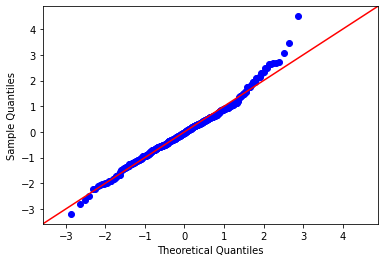

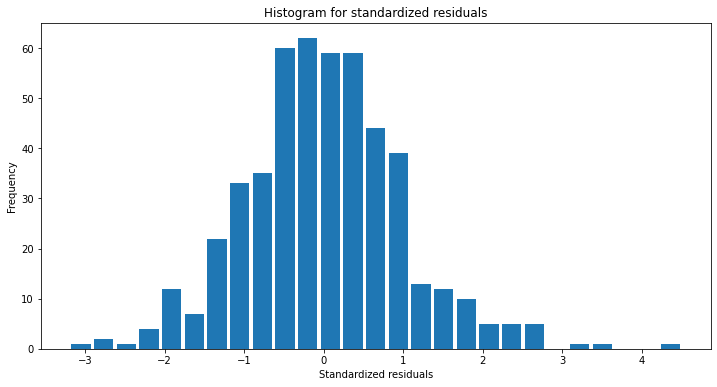

In [27]:
fitted_y = lm3.fittedvalues
residual = lm3.resid

from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

In [28]:
df5.describe()

,price,area,bedrooms,bathrooms,stories,parking,guestroom_yes,mainroad_yes,basement_yes,hotwaterheating_yes,airconditioning_yes
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,9435.306863,3419.353043,2.916836,1.255578,1.762677,0.616633,0.172414,0.845842,0.342799,0.046653,0.300203
std,4498.018954,627.739865,0.731951,0.468081,0.835242,0.817173,0.378123,0.361467,0.475127,0.211109,0.458812
min,2531.205871,2031.009601,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5902.226791,2962.262649,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,8088.885271,3316.624790,3.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,12296.013630,3872.983346,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,21965.800940,5688.585061,6.000000,3.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms'>

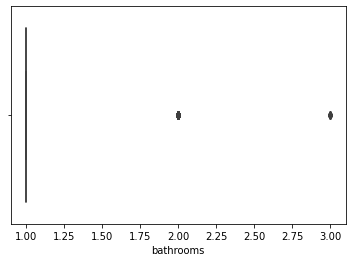

In [29]:
sns.boxplot(df5['bathrooms'])

In [30]:
bathroom = np.where(df5['bathrooms']>2)
bath = [4,117,155,245,448]


In [31]:
# Clean up bathrooms

for i in bath:
    df6 = df5.drop(i)

/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parking'>

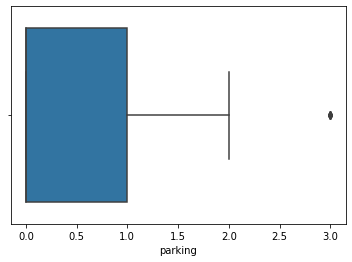

In [32]:
sns.boxplot(df6['parking'])

In [33]:
parking = np.where(df6['parking']>2)
park = [28, 183,254,259,284,420]

In [34]:
# Clean up parking

for i in park:
    df7 = df6.drop(i)

In [35]:
# recheck model update to see improvement
ols = sm.OLS(df7.price, sm.add_constant(df7.iloc[:, 1:11]))
lm4 = ols.fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     350.9
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          1.66e-213
Time:                        23:11:39   Log-Likelihood:                -4306.4
No. Observations:                 491   AIC:                             8635.
Df Residuals:                     480   BIC:                             8681.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.535e+04    

Text(0, 0.5, 'Frequency')

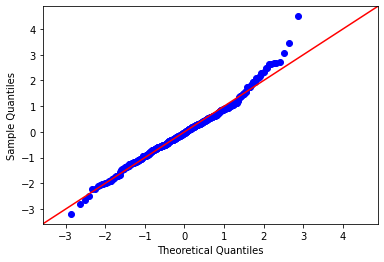

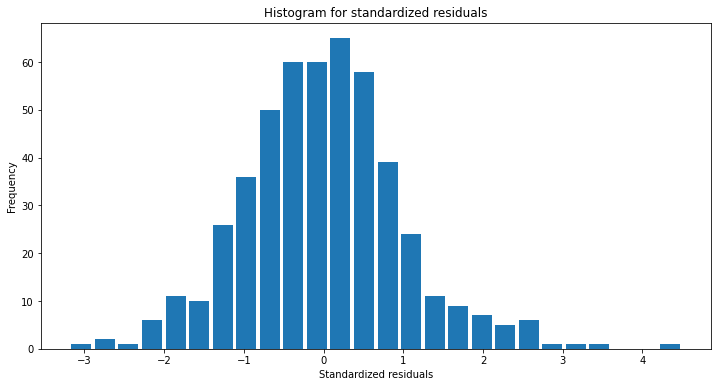

In [36]:
fitted_y = lm4.fittedvalues
residual = lm4.resid

from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

In [37]:
from scipy import stats
from scipy.stats import kstest
print(stats.shapiro(residual))
print(kstest(residual, 'norm'))

ShapiroResult(statistic=0.9860858917236328, pvalue=0.0001223138824570924)
KstestResult(statistic=0.5130560750569698, pvalue=1.715643937024529e-120)


#### Correction done on Y

In [38]:
# Create log of Y 
price = np.log(df7.iloc[:,0:1])

data = pd.concat([price, df7.iloc[:,1:]], axis=1)
data.head()

,price,area,bedrooms,bathrooms,stories,parking,guestroom_yes,mainroad_yes,basement_yes,hotwaterheating_yes,airconditioning_yes
3,9.849127,4330.127019,4,2,2,3,0,1,1,0,1
4,9.774687,4306.971093,4,1,2,2,1,1,1,0,1
5,9.673279,4330.127019,3,3,1,2,0,1,1,0,1
9,9.691847,3791.437722,3,2,4,1,1,1,0,0,1
11,9.962949,3872.983346,4,3,2,2,1,1,1,1,0


In [39]:
ols = sm.OLS(data['price'], sm.add_constant(data.iloc[:, 1:11]))
lm5 = ols.fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     408.6
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          1.50e-227
Time:                        23:11:39   Log-Likelihood:                 219.60
No. Observations:                 491   AIC:                            -417.2
Df Residuals:                     480   BIC:                            -371.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.3511    

Text(0, 0.5, 'Frequency')

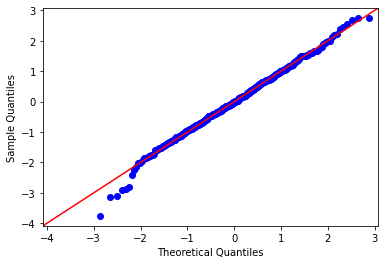

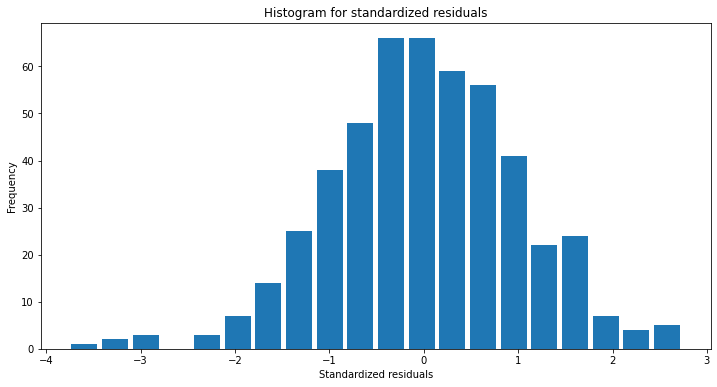

In [40]:
# Check fitness and correction 
fitted_y = lm5.fittedvalues
residual = lm5.resid

from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

In [41]:
print(stats.shapiro(residual))
print(kstest(residual, 'norm'))

ShapiroResult(statistic=0.9952735900878906, pvalue=0.14131273329257965)
KstestResult(statistic=0.3630962824438271, pvalue=1.6508094202168328e-58)


In [42]:
# See if this test improves it at all 
import scipy.stats as stats
Z, fit_lambda = stats.boxcox(df6.price)
print(fit_lambda)

-0.005527869855171534


In [43]:
ols = sm.OLS(Z, sm.add_constant(df6.iloc[:, 1:11]))
lm6 = ols.fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     407.7
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          1.23e-227
Time:                        23:11:40   Log-Likelihood:                 244.11
No. Observations:                 492   AIC:                            -466.2
Df Residuals:                     481   BIC:                            -420.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.2631    

# Best Model

In [44]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     408.6
Date:                Sun, 12 Mar 2023   Prob (F-statistic):          1.50e-227
Time:                        23:11:40   Log-Likelihood:                 219.60
No. Observations:                 491   AIC:                            -417.2
Df Residuals:                     480   BIC:                            -371.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.3511    

In [45]:
df_new = pd.read_csv('/Users/brianoktavec/MSC550/Midterm/housing_test-1.csv')
df_new

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,price
0,3391.164992,3,2,2,yes,yes,no,no,yes,2,13648.38942
1,4006.245125,4,2,2,yes,no,no,no,yes,1,17305.14429
2,3286.335345,3,1,2,yes,no,yes,yes,no,2,10205.51922
3,4229.361654,3,2,1,yes,yes,yes,no,yes,2,17321.41596
4,4486.089611,3,1,1,yes,yes,yes,no,yes,1,15862.92477


In [46]:
# Convert yes/no to dummy data - 1 & 0
mainroad_yes = [1,1,1,1,1]
df1_new = pd.get_dummies(df_new, columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning'], drop_first=True)
df1_new['mainroad_yes'] = mainroad_yes
# extra data to make it fit the model
extra = [1,0,1,1,0]
df1_new['extra'] = extra


# Rearrange the columns
df1_new = df1_new[['price','area','bedrooms','bathrooms','stories','parking','mainroad_yes','guestroom_yes','basement_yes','hotwaterheating_yes','airconditioning_yes', 'extra']]

df1_new

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,extra
0,13648.38942,3391.164992,3,2,2,2,1,1,0,0,1,1
1,17305.14429,4006.245125,4,2,2,1,1,0,0,0,1,0
2,10205.51922,3286.335345,3,1,2,2,1,0,1,1,0,1
3,17321.41596,4229.361654,3,2,1,2,1,1,1,0,1,1
4,15862.92477,4486.089611,3,1,1,1,1,1,1,0,1,0


In [47]:
# Check significance of predictors. Not as significant as shown on the original model but still significant
for x in df1_new:
    print(x + " Test:")
    y = ttest_ind(df1_new['price'], df1_new[x])
    print(y)
    print("")

price Test:
Ttest_indResult(statistic=0.0, pvalue=1.0)

area Test:
Ttest_indResult(statistic=8.049653586843172, pvalue=4.176480810245611e-05)

bedrooms Test:
Ttest_indResult(statistic=11.053244841420451, pvalue=4.000215967410344e-06)

bathrooms Test:
Ttest_indResult(statistic=11.054434462255367, pvalue=3.996963921029441e-06)

stories Test:
Ttest_indResult(statistic=11.054434462255367, pvalue=3.996963921029441e-06)

parking Test:
Ttest_indResult(statistic=11.054434462255367, pvalue=3.996963921029441e-06)

mainroad_yes Test:
Ttest_indResult(statistic=11.054880776341506, pvalue=3.9957446021542484e-06)

guestroom_yes Test:
Ttest_indResult(statistic=11.055178013470876, pvalue=3.99493278843244e-06)

basement_yes Test:
Ttest_indResult(statistic=11.055178013470876, pvalue=3.99493278843244e-06)

hotwaterheating_yes Test:
Ttest_indResult(statistic=11.055475495079312, pvalue=3.994120491570432e-06)

airconditioning_yes Test:
Ttest_indResult(statistic=11.055029364347542, pvalue=3.995338755708051e-0

In [48]:
# Run model on new data and get mse
from sklearn.metrics import mean_squared_error

y_pred1 = lm5.predict(sm.add_constant(df1_new.iloc[:, 1:12]))
mse1 = mean_squared_error(y_pred1,df1_new.price)

In [49]:
print("MSE for Best Model is:", mse1)


MSE for Best Model is: 98562387.28046457
